In [2]:
import numpy as np
import scipy.linalg as la
import scipy as sp
import matplotlib.pyplot as plt
from tqdm import tqdm

In this project we work with the equation $A\mathbf{x} = \mathbf{b}$. The project is divided into three tasks, all considering ways to solve systems like this. Firstly, in task 1, we work with the QR-decomposition of A. Secondly, we look at Tikhonov regularisation, using the same system as we did in task 1. Finally we will consider "Single Channel Source Separation", where we look at a slightly different system.  

##### Task 1: QR with Gram-Schmidt

1.a) Firstly we consider linear systems on the form $A\mathbf{x} = \mathbf{y}$ where $A \in \mathbb{R}^{2x3}$, $x \in \mathbb{R}^{3}$ and $y \in \mathbb{R}^{2}$. Below are two examples of such systems. System (1) does not have a solution, wheras (2) has infinitely many:

System (1): $$A = \begin{bmatrix}
 1& 0 & 0 \\
 0& 0 & 0 \\
\end{bmatrix}
, \mathbf{y} = \begin{bmatrix}
 1\\1
\end{bmatrix}$$

System (2): $$A = \begin{bmatrix}
 4& -1 & 0 \\
 -12& 3 & 1 \\
\end{bmatrix}
, \mathbf{y} = \begin{bmatrix}
 1\\1
\end{bmatrix}$$

In system (1) we get: $0x_1 + 0x_2 + 0x_3 = 1$. This is not possible, hence there are no solution to this system. However, in system (2) we get a free variable $x_1$: $x_2 = 4x_1-1, x_3 = 4$. This implies that our system has infinitely many solutions. Later, system (2) will be used to test some of our functions.  

1.b) Now we have a matrix A $\in \mathbb{R}^{mxn}$, m < n. We want to show that both $AA^T$ and $A^TA$ are symmetric and positive semi-definite. If we want to show that a given matrix B is symmetric, we have to show that $B = B^T$. Moreover, to show positive semi-definiteness for a given matrix B, we have to show that for B $\in \mathbb{R}^{mxm}$ we have $\mathbf{x}^TB\mathbf{x} \geq  0$ for all $\mathbf{x} \in \mathbb{R}^m$ \ {$\mathbf{0}$}. This is done below: 

Symmetric: 
$$
AA^T: (AA^T)^T = (A^T)^TA^T = AA^T \quad \square \\
A^TA: (A^TA)^T = A^T(A^T)^T = A^TA \quad  \square
$$

Positive semi-definite:
\begin{align*}
&AA^T: \mathbf{x}^T(AA^T)\mathbf{x} = \mathbf{x}^TAA^T\mathbf{x} = (A^T\mathbf{x})^TA^T\mathbf{x} = \left\| A^T \mathbf{x}\right\|^2 \geq 0 \quad \square\\
&A^TA: \mathbf{x}^T(A^TA)\mathbf{x} = \mathbf{x}^TA^TA\mathbf{x} = (A\mathbf{x})^TA\mathbf{x} =  \left\| A\mathbf{x}\right\|^2 \geq 0  \quad \square
\end{align*}

The last inequalities comes from the semi positive-definiteness of norms. Additionally, we want to discuss the invertibility of these two matrices. We have that $A^TA \in \mathbb{R}^{nxn}$ and $AA^T \in \mathbb{R}^{mxm}$. Assume that $A$ has full rank ($rank(A) = m$). This implies that $rank(A^T) = m$ as well. Consequently $rank(A^TA)=rank(AA^T)=m$. We know that $AA^T \in \mathbb{R}^{mxm}$, meaning that $AA^T$ is invertible by the equivalent conditions of the invertibility theorem for matrices. However, $A^TA \in \mathbb{R}^{nxn}$ and has $rank(A^TA) = m$. Since $m < n$, $A^TA$ is not invertible. The fact that $AA^T$ is invertible will be used in the next task.

1.c) 

The main goal of Task 1 is to obtain unique solutions from a system with infinitely many solutions. In order to do this we need additional assumptions on $\mathbf{x}$. In our case we ask for the minimal norm solution $\mathbf{x}_{min}$. 

We have given that $\mathbf{x}_{min} = A^T(AA^T)^{-1}\mathbf{y}$. In order to show this we have to calculate $\nabla_x \mathcal{L}(\mathbf{x}, \mathbf{\lambda})$ and $\nabla_\lambda \mathcal{L}(\mathbf{x}, \mathbf{\lambda})$, and set them equal to zero. This way we get a set of equations that can be solved to obtain $\mathbf{x}_{min}$. 

We have that:

$$\mathcal{L}(\mathbf{x}, \mathbf{\lambda}) = \mathbf{x}^T\mathbf{x} + \lambda^T(A\mathbf{x}-\mathbf{y}) \\
$$
$$
\nabla_x \mathcal{L}(\mathbf{x}, \mathbf{\lambda}) = \nabla_\mathbf{x} (\mathbf{x}^T\mathbf{x} + \lambda^T(A\mathbf{x}-\mathbf{y}))
$$

We split this calculation into two parts. Note that in this project the unit vector in a direction k is given by $\hat{x}_k$. First we calculate $\nabla_x (\mathbf{x}^T\mathbf{x}):$
$$
\nabla_x (\mathbf{x}^T\mathbf{x}) = \nabla_x (
\begin{bmatrix}
x_1, & x_2, & \cdots, & x_n \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2\\
\vdots\\
x_n
\end{bmatrix}) = \nabla_x (\sum_{j=1}^{n} x_j^2) = \sum_{j=1}^{n} \hat{x}_j 2x_j = \underline{2\mathbf{x}}
$$

Secondly, we calculate $\nabla_\mathbf{x}( \lambda^T(A\mathbf{x}-\mathbf{y})):$

$$
\nabla_\mathbf{x}( \lambda^T(A\mathbf{x}-\mathbf{y})) = \nabla_\mathbf{x} (\lambda^TA\mathbf{x}) = 
\nabla_\mathbf{x}( 
\begin{bmatrix}
\lambda_1, & \lambda_2, & \cdots, & \lambda_n \\
\end{bmatrix}
A\mathbf{x})
$$ 

$A\mathbf{x}$ can be written as:
$
\begin{bmatrix}
 \sum_{j=1}^{n} a_{1j} x_j\\
 \vdots\\
\sum_{j=1}^{n} a_{nj} x_j
\end{bmatrix}
$

$$ 
\implies 
\nabla_\mathbf{x}(
\begin{bmatrix}
\lambda_1, & \lambda_2, & \cdots, & \lambda_n \\
\end{bmatrix} 
\begin{bmatrix}
 \sum_{j=1}^{n} a_{1j} x_j\\
 \vdots\\
\sum_{j=1}^{n} a_{nj} x_j
\end{bmatrix}
) = \nabla_\mathbf{x}(\lambda_1 \sum_{j=1}^{n} a_{1j} x_j + \lambda_2 \sum_{j=1}^{n} a_{2j} x_j + \cdots + \lambda_n \sum_{j=1}^{n} a_{nj} x_j)
$$

Lets see what happens with each term: 

$$
\hat{x_k} \frac{\partial }{\partial x_k} (\lambda_1 \sum_{j=1}^{n} a_{1j} x_j + \cdots + \lambda_n \sum_{j=1}^{n} a_{nj} x_j) = \hat{x_k}(\lambda_1 a_{1k} \frac{\partial }{\partial x_k} x_k + \lambda_2 a_{2k} \frac{\partial }{\partial x_k} x_k + \cdots + \lambda_n a_{nk}\frac{\partial }{\partial x_k} x_k) \\
= \hat{x_k}(\lambda_1 a_{1k} + \lambda_2 a_{2k} + \cdots + \lambda_n a_{nk}) = \sum_{j=1}^{n} a_{jk} \lambda_j \hat{x}_k \\ 
\implies \nabla_\mathbf{x}( \lambda^TA\mathbf{x}) =  
\begin{bmatrix}
\sum_{j=1}^{n} a_{j1} \lambda_j \\
\sum_{j=1}^{n} a_{j2} \lambda_j\\
\vdots\\
\sum_{j=1}^{n} a_{jn} \lambda_j
\end{bmatrix} = 
\begin{bmatrix}
\sum_{j=1}^{n} (a_{1j})^T \lambda_j \\
\sum_{j=1}^{n} (a_{2j})^T \lambda_j\\
\vdots\\
\sum_{j=1}^{n} (a_{nj})^T \lambda_j
\end{bmatrix}
= \underline{A^T\mathbf{\lambda}}
$$

Combining these calculations we get: 
$$
\nabla_x \mathcal{L}(\mathbf{x}, \mathbf{\lambda}) = \underline{2 \mathbf{x} + A^T\mathbf{\lambda}}
$$


Now, we calculate $\nabla_{\lambda}\mathcal{L}(\mathbf{x}, \mathbf{\lambda})$. We know that $A\mathbf{x} - \mathbf{y}$ is a vector in $\mathbb{R}^m$, we call this vector $\mathbf{z}$:


$$\nabla_{\lambda} \mathcal{L} (\mathbf{x}, \mathbf{\lambda}) = \nabla_{\lambda}(\mathbf{x}^T\mathbf{x} + \mathbf{\lambda}^T(A\mathbf{x}-\mathbf{y})) = \nabla_{\lambda}(\mathbf{x}^T\mathbf{x} + \mathbf{\lambda}^T\mathbf{z})= \nabla_{\lambda}(\mathbf{\lambda}^T\mathbf{z}) = \\ \nabla_{\lambda} (
\begin{bmatrix}
 \lambda_1,& \cdots, & \lambda_n \\
\end{bmatrix}
\begin{bmatrix}
 z_1\\
 \vdots\\
z_n
\end{bmatrix}) \\
= \nabla_{\lambda} (\lambda_1z_1 + \cdots + \lambda_nz_n)
= (\hat{x}_1 \frac{\partial}{\partial\lambda_1}\lambda_1z_1 + \cdots + \hat{x}_n \frac{\partial}{\partial\lambda_n}\lambda_nz_n)$$

$$
= \mathbf{z} = \underline{A\mathbf{x} - \mathbf{y}}
$$

Finally we get: 

$$
(1)\quad \nabla_x \mathcal{L}(\mathbf{x}, \mathbf{\lambda}) = 2 \mathbf{x} + A^T\mathbf{\lambda}  \\
(2)\quad \nabla_{\lambda}\mathcal{L}(\mathbf{x}, \mathbf{\lambda}) = A\mathbf{x} - \mathbf{y}  \quad
$$

We know that a solution to this optimization probem satisfies $\nabla_x \mathcal{L}(\mathbf{x}, \mathbf{\lambda}) = 0$ and $\nabla_{\lambda}\mathcal{L}(\mathbf{x}, \mathbf{\lambda})=0$. We solve this system with respect to $\mathbf{x}$. 

$$
(1) \quad 2 \mathbf{x} + A^T\mathbf{\lambda} = 0 \implies \mathbf{x} = -\frac{1}{2}A^T\mathbf{\lambda} \\
(2) + (1) \quad A\mathbf{x} - \mathbf{y} = 0 \implies A(-\frac{1}{2}A^T\mathbf{\lambda}) - \mathbf{y} = 0
$$

We know that $AA^T$ is invertible from 1.b):

$$
(-\frac{1}{2}AA^T\mathbf{\lambda}) - \mathbf{y} = 0 \implies -2(AA^T)^{-1}\mathbf{y} = \lambda
$$

If we combine this expression for $\lambda$ with (1), we obtain:
$$
\mathbf{x} = A^T(AA^T)^{-1}\mathbf{y} \quad \square
$$

1.d) 
In this task we are going to implement a function that calculates the QR decomposition of a given matrix $A$. This function will be used to solve the system. In order to do this we have to express $\mathbf{x}_{min}$ with the matrices $Q$ and $R$. We know that $A^T = QR$:

$$
\mathbf{x}_{min} = A^T(AA^T)^{-1}\mathbf{y} = QR(A QR)^{-1}\mathbf{y}
$$

Have that $A = (A^T)^T = (QR)^T:$

$$
\mathbf{x}_{min} =QR((QR)^T QR)^{-1}\mathbf{y} = QR(R^TQ^T QR)^{-1}\mathbf{y}
$$

Since Q is orthogonal, $Q^TQ = I:$

$$
\implies \mathbf{x}_{min} =QR(R^TR)^{-1}\mathbf{y} = QRR^{-1}R^{-T}\mathbf{y} = QR^{-T}\mathbf{y} \quad \square
$$

Knowing that $\mathbf{x}_{min}=QR^{-T}\mathbf{y}$, we will now implement the QR decomposition function. The function below takes $A$ as input and returns both $Q$ and $R.$ Note that the function use Gram-Schmidt to find an orthogonal basis of $A$, and then use the resulting vectors to calculate $Q$ and $R$. 

In [3]:
def QR_decomp(A): 
    ''' 
    Takes a matrix m * n matrix A (where m < n) and calculate the QR decomposition. 
    Uses Gram-Schmidt to calculate Q, and then R from the dot product of the 
    columns in A and Q.
    Intput:
        m * n Matrix A, m < n. 
    Output:
        m * n Matrix Q 
        n * n Matrix R
    '''
    
    m,n = np.shape(A)
    At = np.transpose(A)
    
    Q = np.zeros((n,m))
    R = np.zeros((m,m))
    
    u_k = At[:,0] #u_0 
    
    #implementing gram-Schmidt 
    for k in range(m):
        sum_tot = 0
        for j in range(k):
            sum_tot += (At[:,k]@Q[:,j])*Q[:,j]
        u_k = At[:,k] - sum_tot
        
        Q[:,k] = u_k / la.norm(u_k)
        for j in range(k, m): #R matrix
            R[k,j] = At[:,j]@Q[:,k]
            
    return Q, R    

Usually, one does not calculate the inverse of a matrix because it requires a lot of computational power. Alternativley, the equation can be rewritten and solved in two steps:

$$
\mathbf{x}_{min} = QR^{-T}\mathbf{y} 
$$


Know that $Q^TQ=I$. By multiplying the equation with $Q^T$, and then $R^{T}$ we get:

$$
R^{T}Q^T\mathbf{x}_{min} = \mathbf{y}
$$

If we define $Q^T\mathbf{x}_{min} = \mathbf{z}$ we can solve the system by calculating $R^T\mathbf{z} = \mathbf{y}$ and then $\mathbf{x}_{min} = Q\mathbf{z}$. Below is a function that uses this method to calculate $\mathbf{x}_{min}$. 

In [4]:
def solve_QR(Q,R,y):
    '''
    Takes inn Q,R (from a QR decomposition) and y and calculates a solution x_min from the equation QRx_min = y.    
    Input:
        n * m Matrix Q, m < n
        m * m Matrix R
        Vector y with dimention m
    Output:
        Vector x_min with dimention n
    '''
    z = la.solve_triangular(np.transpose(R), np.transpose(y),lower=True) 
    x_min = np.dot(Q,z) 
    return x_min

We should test this function. We use system (2) from 1.a) to check:

In [5]:
A_test = np.array([[4,-1,0],
             [-12,3,1]])

y_test = np.array([42,21])

Q, R = QR_decomp(A_test) #A must be full rank. here rank = m, since A is m*n and m<n
print('A_test = ', A_test)
print('Check that QR = A^T:')
print('Q dot R =', Q@R)
print('Check solve_QR. A_test dot x_min should be equal to y_test:')
x_min = solve_QR(Q,R,y_test)
print('y_test = ', y_test)
print('A_test dot x_min =', A_test@x_min)

A_test =  [[  4  -1   0]
 [-12   3   1]]
Check that QR = A^T:
Q dot R = [[  4. -12.]
 [ -1.   3.]
 [  0.   1.]]
Check solve_QR. A_test dot x_min should be equal to y_test:
y_test =  [42 21]
A_test dot x_min = [42. 21.]


The test above seems to be ok.

1f) Now that we have implementet the functions above, we want to test how they cope with larger systems, using the handed-out code. In addition we are going to compare our functions to NumPy implementations. Here we are solving for 100 different y and x. As we run some of the code blocks we time them as well. This way we can see which functions reqiure the most computational power. A short discussion of these results comes inbetween the code blocks below.  

In [6]:
# Generate matrix A \in \mathbb{R}^{m \times n}
def generate_A(m,n):
    """
    Generates m times n with correlated columns.
    Input:
        m: int, first dimension of A
        n: int, second dimension of A
    output:
        A: (m,n) array
    """

    cov_eigvecs = np.random.uniform(-1.0,1.0,(n,n))
    cov = cov_eigvecs.T @ cov_eigvecs
    v = np.sqrt(np.diag(cov))
    outer_v = np.outer(v, v)
    corr = cov / outer_v
    corr[cov == 0] = 0
    chol = sp.linalg.cholesky(corr, lower=True) 
    A = np.random.normal(0, 1.0,(m,n))
    A = np.dot(A,chol.T)
    return A

In [7]:
m = 1024*2
n = 4048*2
N = 100  # Number of test data we want to generate

In [9]:
%%timeit -r 1 -n 1
A = generate_A(m,n)
AAT = np.dot(A, A.T)

8.43 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [10]:
# Generate solutions X columnwise, X[:,i] to access i-th vector
X = np.random.normal(0.0,1.0,(A.shape[1],N))

# Generate left hand sides Y columnwise Y[:,i] to access lhs
Y = np.dot(A,X)

# Doublecheck shapes
print(X.shape) # Expect (n,N)
print(Y.shape) # Expect (m,N)

(8096, 100)
(2048, 100)


First, let us compare our QR decomposition to numpy.linalg.qr():

In [12]:
%%timeit -r 1 -n 1
Q, R = QR_decomp(A)

5min 14s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [14]:
%%timeit -r 1 -n 1
Q_numpy, R_numpy = np.linalg.qr(A.T)

1.12 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In the two code blocks above, we time our own and NumPy's QR decomposition. It is clear that our implementation requires more time to finish. The NumPy implementations are well written, so the fact that it is more efficient is not suprising.

Next, we compare how fast our solver solve_QR() and numpy.linalg.solve() solves 100 different system. Numpy.linalg.solve() requires that the input matrix A is square and of full rank, therefore we have to rewrite our system and solve:

$$ AA^T\mathbf{z} = \mathbf{y} \\
\quad \mathbf{x}_{min} = A^T\mathbf{z}$$

Our solver:

In [30]:
%%timeit -r 1 -n 1
norm_values_mySolver = np.zeros(N)
for i in range(N):
    x_min_mySolver = solve_QR(Q, R, Y[:,i])
    norm_values_mySolver[i] = la.norm(x_min_mySolver - X[:,i])

Using numpy.linalg.solve():

In [32]:
%%timeit -r 1 -n 1
norm_values_numpy = np.zeros(N)
for i in range(N):
    z = np.linalg.solve(AAT, Y[:,i])
    x_min_numpy = np.dot(A.T, z)
    norm_values_numpy[i] = la.norm(x_min_numpy - X[:,i]) 

7.64 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Our solver is faster than numpy.linalg.solve(). One reason for this may be that we have pre-calculated Q and R, and takes use of numpy.linalg.solve_triangular() which is more efficient than the usual numpy.linalg.solve(). Numpy.linalg.solve_triangular() takes advantage of the fact that our system contains the (lower) triangular matrix $R^T$ to make the calculations less complex. On the other hand, numpy.linalg.solve() have to manipulate and then solve the system, meaning that there requires more computational power. 

Furthermore, we can look at the value $\left\|\mathbf{x}_{min} - \mathbf{x}_{true} \right\|$, where $\mathbf{x}_{true}$ is an element in X, that is a part of the handed out code. We do this through a plot that compares the value of $\left\|\mathbf{x}_{min} - \mathbf{x}_{true} \right\|$ from numpy.linalg.solve() and our solver. This plot shows the difference in this value for all 100 $\mathbf{x}_{min}$.

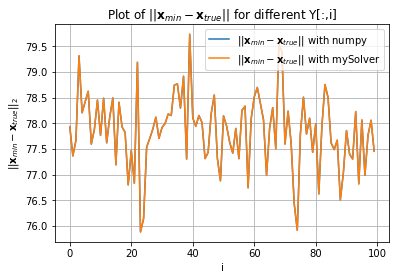

In [33]:
N_list = np.arange(0,N) 
plt.plot(N_list, norm_values_numpy, label = "$||\mathbf{x}_{min} - \mathbf{x}_{true}||$ with numpy")
plt.plot(N_list, norm_values_mySolver, label = "$||\mathbf{x}_{min} - \mathbf{x}_{true}||$ with mySolver")
plt.xlabel("i")
plt.ylabel("$||\mathbf{x}_{min} - \mathbf{x}_{true}||_2$") 
plt.title("Plot of $||\mathbf{x}_{min} - \mathbf{x}_{true}||$ for different Y[:,i]")
plt.grid()
plt.legend()
plt.show()


The first thing we realize is that the value of $\left\|\mathbf{x}_{min} - \mathbf{x}_{true} \right\|$ from both solvers are identical. Consequently, we know that both calculate the same unique minimizer $\mathbf{x}_{min}$. With this in mind, we can say that we have found a meaningfull solution.

# Task 2

In this task we want to solve our system with Tikhonov regularisation. Tikhonov regularisation is given by: 


$$
\mathbf{x}_r = \underset{\mathbf{x}\in \mathbb{R}^n}{argmin}\left\| A\mathbf{x}-\mathbf{y} \right\|^2 + \mu \left\| \mathbf{x} \right\|^2
$$


If $A\mathbf{x}=\mathbf{y}$ has infinitely many solution, $\underset{\mathbf{x}\in \mathbb{R}^n}{argmin}\left\| A\mathbf{x}-\mathbf{y}\right\|^2$ can give any $\mathbf{x}$. However, if we add the $\mu$-term, we can minimize the norm of $\mathbf{x}$ as well. 
Tikhonov regularisation tries to minimize both $||A\mathbf{x}-\mathbf{y}||^2$ and $||\mathbf{x}||^2$, whereas the value of $\mu$ decide what is most important; a small norm $\mathbf{x}$ (large values of $\mu$) or a solution to $A\mathbf{x}=\mathbf{y}$ (small values of $\mu$). We "balance" between a solution of $A\mathbf{x}-\mathbf{y}$ and a small norm of $\mathbf{x}$ as stated in the task description. 

2.a) First, we want to show that a solution $\mathbf{x}_r$ satisfies $(A^TA + \mu I)\mathbf{x}_r = A^T\mathbf{y}$. We start with:


$$
T(\mathbf{x}) = \left\| A\mathbf{x}-\mathbf{y} \right\|^2 + \mu \left\| \mathbf{x} \right\|^2 \\
$$

We are going to calculate $\nabla_{\mathbf{x}}T(\mathbf{x}) = 0$.

$$
\nabla_{\mathbf{x}}T(\mathbf{x}) = \nabla_{\mathbf{x}}(\left\| A\mathbf{x}-\mathbf{y} \right\|^2 + \mu \left\| \mathbf{x} \right\|^2)
= \nabla_{\mathbf{x}}((A\mathbf{x}-\mathbf{y})^T(A\mathbf{x}-\mathbf{y})) + \nabla_{\mathbf{x}}(\mu \mathbf{x}^T\mathbf{x}) = \nabla_{\mathbf{x}}(((A\mathbf{x})^T-\mathbf{y}^T)(A\mathbf{x}-\mathbf{y})) + \nabla_{\mathbf{x}}(\mu \mathbf{x}^T\mathbf{x}) 
$$

Let $g(\mathbf{x}) = \mu \left\|\mathbf{x}\right\|^2$ and $h(\mathbf{x}) = \left\|A\mathbf{x} - \mathbf{y} \right\|^2$:

$$
g(\mathbf{x}) = \mu \Sigma_{i=1}^n x_i^2 \implies \nabla_\mathbf{x} g(\mathbf{x}) = 2 \mu \mathbf{x}
$$

Then, let $r_i$ be the i-th row and $a_i$ be the i-th column of A.

$$
h(\mathbf{x}) = \Sigma_{i=1}^m (r_i \mathbf{x} -y_i)^2 = \Sigma_{i=1}^m ((\Sigma_{j=1}^n a_{ij}x_j)^2 - 2 y_i \Sigma_{j=1}^n a_{ij} x_j + y^2_i) \implies \frac{\partial h}{\partial x_p} = \Sigma_{i=1}^m 2 a_{ip} r_i \mathbf{x} - 2 a_{ip} y_i = 2 a_p^T A \mathbf{x} - 2 a_p^T \mathbf{y} \\
\implies \nabla_x h(\mathbf{x}) = 2A^T(A\mathbf{x} - \mathbf{y})
$$

We get that the gradient of $T(\mathbf{x})$ is:
$$
\nabla_\mathbf{x} T(\mathbf{\mathbf{x}}) = \frac{1}{2} \nabla h + \nabla g = A^T (A\mathbf{x}- \mathbf{y}) + 2 \mu \mathbf{x} = (A^TA+\mu I) \mathbf{x} - A^T\mathbf{y}
$$ 

If we set $\nabla_\mathbf{x} T(\mathbf{x}) = 0$, we get the expression that we wanted to find: 

$$
(A^TA + \mu I)\mathbf{x} = A^T\mathbf{y} \quad \square
$$

Where $\mathbf{x} = \mathbf{x}_r$ is a solution of $\mathbf{x}_r = \underset{\mathbf{x} \in \mathbb{R}}{argmin} \left\| A\mathbf{x}-\mathbf{y} \right\|^2 + \mu \left\| \mathbf{x} \right\|^2$

Now we have to show that $(A^TA + \mu I)$ is SPD, and therefore invertible. This result will be used later in this task. In order to show that the matrix is SPD we have to show that it is symmetric and that $\mathbf{x}^TB^T\mathbf{x} > 0$ for all $\mathbf{x} \in \mathbb{R}^n$ \ ${\mathbf{\left\{0 \right\}}}$.

First, we consider symmetry: 
$$
(A^TA + \mu I)^T = (A^TA)^T + (\mu I)^T = A^TA + \mu I \quad ok
$$

Secondly, we have to show that the matrix is SPD: 

\begin{align*}
\mathbf{x}^T(A^TA + \mu I)\mathbf{x} &= \mathbf{x}^TA^TA\mathbf{x} + \mu\mathbf{x}^TI\mathbf{x}^T \\
&=(A\mathbf{x})^T(A\mathbf{x}) + \mu\mathbf{x}^T\mathbf{x}\\
&= ||A\mathbf{x}||^2 + \mu||\mathbf{x}|| \geq \mu||\mathbf{x}|| > 0\\
\end{align*}

The last inequality comes from positive definiteness of norms and the fact that $\mathbf{x} ≠ 0$. As a result, the matrix is SPD and symmetric, and therefore invertible. $\quad \square$ 


2.b) To try and solve the system, we need to find an expression for $\mathbf{x}_r$. Therefore, we want to show that $\mathbf{x}_r$ satisfies $\mathbf{x}_r = VDU^T$ by using SVD for $A$:

\begin{align*} 
(A^TA + \mu VV^T)\mathbf{x} &= A^T\mathbf{y} \\
((U\Sigma V^T)^T(U\Sigma V^T) + \mu VV^T) \mathbf{x}_r &= (U\Sigma V^T)^T\mathbf{y} \\
(V\Sigma^T U^TU\Sigma V^T + \mu VV^T) \mathbf{x}_r &= V\Sigma^T U^T\mathbf{y} \\
V(\Sigma^T \Sigma + \mu ) V^T \mathbf{x}_r &= V\Sigma^T U^T\mathbf{y} \\
V^T \mathbf{x}_r &= (\Sigma^T \Sigma + \mu )^{-1} \Sigma^T U^T\mathbf{y} \\
\mathbf{x}_r &= V^{-T} (\Sigma^T \Sigma + \mu )^{-1} \Sigma^T U^T\mathbf{y} \\
\mathbf{x}_r &= V D U^T\mathbf{y} 
\end{align*}

Here $D = (\Sigma^T \Sigma + \mu )^{-1} \Sigma^T$. We also know that V is orthogonal, such that $V^{-1} = V^T$ and $V^T=V$. This gives $V^{-T}=V$. $\quad \square$ 

2.c) Now that we have an expression for $\mathbf{x}_r$, we want to create a function that uses the SVD to solve the problem above. To do this we have to know what the diagonal matrix D looks like. We know that $\Sigma \in \mathbb{R}^{mxn}$, where m < n. In addition we know that D contains  the singular values of $A$ on the diagonal: $\sigma_1, \sigma_2, \cdots, \sigma_m$. The rest of the elemnts in $\Sigma$ is zero. 

$$
\Sigma = 
\begin{bmatrix}
\sigma_1 & &  &  &  & & \\
& \ddots&  &  &  & & \\
& & \ddots &  & &  &\\
& & &\sigma_m & &  & \\
\end{bmatrix}
$$

$$
\Sigma^T = \begin{bmatrix}
 \sigma_1&  &  &  \\
 &  \ddots &  &  \\
 &  &\ddots  &  \\
 &  &  & \sigma_m \\
 &  &  &  \\
 &  &  &  \\\
 & &  &  \\
\end{bmatrix}
$$

$$ 
\implies
\Sigma^T\Sigma = 
\begin{bmatrix}
 \sigma_1^2&  &  &  &  &  &  \\
 & \ddots &  &  &  &  &  \\
 &  & \ddots &  &  &  &  \\
 &  &  & \sigma_m^2 &  &  &  \\
 &  &  &  & 0 &  &  \\
 &  &  &  &  & \ddots &  \\
 &  &  &  &  &  & 0 \\
\end{bmatrix}
$$

We have that $(\Sigma^T\Sigma)_{ij} = 0$, except on the diagonal where $(\Sigma^T\Sigma)_{ii} = \sigma_i$ for $i = 0,1,...,m$. This yields that:

$$
(\Sigma^T \Sigma + \mu I ) = 
\begin{bmatrix}
 \sigma_1^2 + \mu&  &  &  &  &  &  \\
 & \ddots &  &  &  &  &  \\
 &  & \ddots &  &  &  &  \\
 &  &  & \sigma_m^2 + \mu &  &  &  \\
 &  &  &  & \mu &  &  \\
 &  &  &  &  & \ddots &  \\
 &  &  &  &  &  & \mu \\
\end{bmatrix}
$$

Since $\Sigma^T \Sigma + \mu I$ is diagonal, the inverse is easy to calculate:

$$
(\Sigma^T \Sigma + \mu I )^{-1} = 
\begin{bmatrix}
 \frac{1}{\sigma_1^2 + \mu}&  &  &  &  &  &  \\
 & \ddots &  &  &  &  &  \\
 &  & \ddots &  &  &  &  \\
 &  &  & \frac{1}{\sigma_m^2 + \mu} &  &  &  \\
 &  &  &  & \frac{1}{\mu} &  &  \\
 &  &  &  &  & \ddots &  \\
 &  &  &  &  &  & \frac{1}{\mu} \\
\end{bmatrix}
$$

$$
D = (\Sigma^T \Sigma + \mu I )^{-1}\Sigma^T = \begin{bmatrix}
 \frac{\sigma_1}{\sigma_1^2 + \mu}&  &  &  \\
&  \ddots & &  \\
&  &\ddots  &  \\
&  &  & \frac{\sigma_m}{\sigma_m^2 + \mu}\\
&  &  &  \\
&  &  &  \\
&  &  &  \\
\end{bmatrix}
$$

Where $D \in \mathbb{R}^{nxm}$ for m < n.

Knowing the matrix D, we are now ready to implement our Tikhonov_solveSVD()-function:

In [20]:
def Tikhonov_solveSVD(U,S,Vt,mu, y):
    #S er her sigma matrisen med de singulære verdiene, men representert som en vektor
    '''
    Calculates x_r.
    Input:
        m * m Matrix U
        Vector S with dimention m 
        n * n Matrix Vt, (inverse of V)
        Value mu > 0 
        Vector y with dimention m
    Output:
        "Balanced" solution x_r
    '''
    m = U.shape[0]
    n = Vt.shape[0]
    D = np.zeros(n*m, dtype = float).reshape(n,m)
    V = Vt.T
    for i in range(len(S)): #calculate VdotD and the inverse of A, which is the D from 2b)
        D[i][i] = S[i]/(S[i]*S[i]+ mu) 
    
    VD = np.dot(V, D)
    VDUT = np.dot(VD,U.T)
    x_r = np.dot(VDUT, y) 
    return x_r

d) Now we want to do a nummerical experiment where solve our system for many values of $\mu$. Here we create our own solver that uses SVD, and compare it to numpy.linalg.solve(). We genereate 100 different logarithmically spaced values of $\mu$ to evalute the SVD solver. When using numpy.linalg.solve(), we decrease this value to 30. However, when calculating the values $\mathbf{x}_r$, we save the error $||\mathbf{x}_r(\mu) − \mathbf{x}_{true}||$ so that we can make comparisons. 

In [21]:
mu_vals = np.logspace(6,-6,num = 100)

y = Y[:,0]
x_true = X[:,0]

def SVD_Solver(A, x_true, y, mu_vals):
    '''
    Takes in A, x_true, y and mu_vals(for the SVD solver) and returns a list of errors ||x_r - x_true||
    Input: 
        m * n Matrix A, m < n. 
        Vector x_true with dimention n
        Vector y with dimention m
        Vector mu_vals_numpy 
    Output:
        List of errors 
    '''
    U, S, Vt = np.linalg.svd(A, full_matrices=False)
    error = np.zeros(len(mu_vals), dtype = float)
    for i in range(len(mu_vals)):
        xr = Tikhonov_solveSVD(U, S, Vt, mu_vals[i], y)
        error[i] = la.norm(xr - x_true)
    return error

In [22]:
mu_vals_numpy = np.logspace(6,-6,num = 30)

def Numpy_Solver(A, x_true, y, mu_vals_numpy):
    '''
    Takes in A, x_true, y and mu_vals(less values than mu-values for the SVD solver) and returns a list of errors ||x_r - x_true||
    Input: 
        m * n Matrix A, m < n. 
        Vector x_true with dimention n
        Vector y with dimention m
        Vector mu_vals_numpy 
    Output:
        List of errors 
    '''
    ATA = np.dot(A.T, A)
    ATb = np.dot(A.T,y)
    n = ATA.shape[0]
    error = np.zeros(len(mu_vals_numpy), dtype = float)
    
    for i in range(len(mu_vals_numpy)):
        x = np.linalg.solve(ATA+mu_vals_numpy[i]*np.identity(n), ATb)
        error[i] = la.norm(x - x_true)
    return error

In [216]:
%%timeit -r 1 -n 1
error_mySolver = SVD_Solver(A, x_true, y, mu_vals)

1min 48s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [220]:
%%timeit -r 1 -n 1
error_numpy = Numpy_Solver(A, x_true, y, mu_vals_numpy)

1min 33s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [299]:
Q, R = np.linalg.qr(A.transpose())
x_min = solve_QR(Q,R,y)
norm_x_min = la.norm(x_min-x_true)
print('||x_min - x_true|| = ', norm_x_min)

||x_min - x_true|| =  78.74387637205419


Above, we have calculated the $\mathbf{x}_{min}$ solution. The reason for this is so that we can compare $||\mathbf{x}_{min} - \mathbf{x}_{true}||$ to our plotting below.  

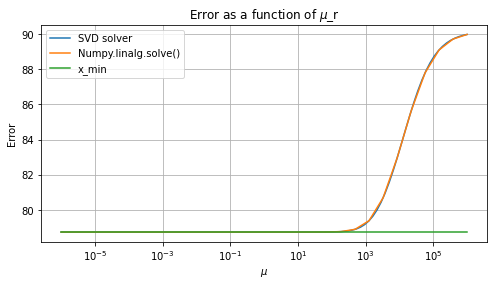

In [300]:
plt.plot(mu_vals, error_mySolver, label = "SVD solver")
plt.plot(mu_vals_numpy, error_numpy, label = "Numpy.linalg.solve()")
plt.plot(mu_vals, norm_x_min*np.ones(100), label = "x_min")
plt.xscale("log")
plt.grid()
plt.ylabel('Error')
plt.xlabel('$\mu$')
plt.legend()
plt.title("Error as a function of $\mu$_r")
plt.show()

Examining the graph above, we can see that the SVD and numpy solver has the same error. In addition, the numpy.linalg.solve() requires a lot more computational power than the SVD solver. The reason may be that we have calculated an SVD of A beforehand, so that SVD_Solver() calculates x_r with fewer steps than Numpy_Solver(). Moreover, for $\mu$ values less than approximately $10^1$, we have that the error converges to the error in $\mathbf{x}_{min}$. For $\mu$-values larger than $10^1$, the error becomes larger. Therefore it is reasonable to state that $\mu$-values less than $10^1$ gives a good reconstruction of $\mathbf{x}_{true}$. 

# Task 3

In this task we are going to study Single Channel Source Separation. The main idea is that we separate a system into two vectors $\mathbf{u}$ and $\mathbf{v}$ so that $A\mathbf{x} = \mathbf{y} = \mathbf{u} + \mathbf{v}$, while $\mathbf{u}$ are small in some norm, and $\mathbf{v}$ are small in some other norm. Using some of the coding from task 1) we are going to separate images from the handed out code into $\mathbf{u}$ and $\mathbf{v}$. This way, we can make an assessment of how well Single Channel Source Separation works when combining it with our coding from task 1).

Here are some of elements that we will use throughout this task:


$$
B = \begin{bmatrix}
B_0 & 0 \\
0 & B_1 \\
\end{bmatrix} =  
\begin{bmatrix}
I-W_0W_0^T & 0 \\
0 & I-W_1W_1^T \\
\end{bmatrix}, \quad A =\begin{bmatrix} I&  I\\\end{bmatrix}, \quad \mathbf{x} = \begin{bmatrix}\mathbf{u}\\\mathbf{v}\end{bmatrix}
$$

3.a) We are going to show that B is a projection matrix and that it is symmetric positive semi-definite. This results will be helpfull later.

Projection:
$$
B^2 = (I-WW^T)(I-WW^T) = I - WW^T - IWW^T + WW^TWW^T = I - 2WW^T + WW^T = I - WW^T = B
$$

Symmetric:
$$
B^T = (I-WW^T)^T = I^T - (W^T)^TW^T = I-WW^T = B
$$

Positive semi-definite:
$$
\mathbf{x}^TA\mathbf{x} = \mathbf{x}^TB^2\mathbf{x} = \mathbf{x}^TB^TB\mathbf{x} = (B\mathbf{x})^T(B\mathbf{x}) = \left\| B\mathbf{x}\right\|^2 \geq 0 
$$

The last inequality comes from the positive definiteness of norms. 

3.b) In this part we are going to find find a set of equations so that we can find $\mathbf{u}$ and $\mathbf{v}$. At the end we are going to test our implementations with the handed-out code. 


1) First we want to show that we get the system:

$$
\begin{bmatrix}
 \frac{1}{2}(B^T+B)& A^T  \\
 A& 0 \\
\end{bmatrix} 
\begin{bmatrix}
 \mathbf{x}\\
 \lambda
\end{bmatrix}
= 
\begin{bmatrix}
 0\\
 \mathbf{y}
\end{bmatrix}
$$

And that this can be written as: 

$$
\begin{bmatrix}
I-W_0W_0^T & 0 & I \\
0 & I-W_1W_1^T & I \\
I & I & 0 \\
\end{bmatrix}
\begin{bmatrix}
\mathbf{u}\\
\mathbf{v}\\
\lambda\\
\end{bmatrix}
= 
\begin{bmatrix}
0\\
0\\
\mathbf{y}\\
\end{bmatrix}
$$
by using the minimal norm approach. 


We have that $\nabla_x \mathcal{L}(\mathbf{x}, \mathbf{\lambda}) = \frac{1}{2}\mathbf{x}^TB\mathbf{x}+\lambda^T(A\mathbf{x}-\mathbf{y})$. 

Now we want to calculate $\nabla_x \mathcal{L}(\mathbf{x}, \mathbf{\lambda})$ and $\nabla_\lambda \mathcal{L}(\mathbf{x}, \mathbf{\lambda})$ and set them equal to zero, like we did earlier. This way we can find a system of equations so that we can calculate $\mathbf{u}$ and $\mathbf{v}$:

$$
\nabla_x \mathcal{L}(\mathbf{x}, \mathbf{\lambda}) = \nabla_x (\frac{1}{2}\mathbf{x}^TB\mathbf{x} + \lambda^T(A\mathbf{x}-\mathbf{y}))
$$

We recognize the second term from 1.c). Therefore we only have to calculate the first term: 

$$
\nabla_\mathbf{x} (\mathbf{x}^TB\mathbf{x}) = \nabla_\mathbf{x}(\Sigma_{i=1}^n b_i^T \mathbf{x} x_i) \implies \frac{\partial (\Sigma_{i=1}^n b_i^T \mathbf{x} x_i)}{\partial x_p} = b_p^T \mathbf{x} + \Sigma_{j=1}^n b_{pj} x_j = b_p^T \mathbf{x} + r_p \mathbf{x}
$$

Where $b_p$ is the p-th column and $r_p$ is the p-th row of B. 

$$
\nabla_\mathbf{x} (\mathbf{x}^TB\mathbf{x}) = 
\begin{bmatrix} b_1^T \mathbf{x} + r_1 x \\ \vdots \\ b_n^T\mathbf{x} + r_n \mathbf{x} 
\end{bmatrix} = (B^T + B)\mathbf{x} 
$$

Combining these two we get:

$$
\nabla_x \mathcal{L}(\mathbf{x}, \mathbf{\lambda}) = (B^T + B)\mathbf{x} + A^T\lambda
$$

Further, we have that $\nabla_\lambda \mathcal{L}(\mathbf{x}, \mathbf{\lambda}) = \nabla_\lambda(\lambda^T(B\mathbf{x}- \mathbf{y}))$. We did this calculation in 1c) as well, so we finally get: 

\begin{align*} 
(I)\quad \nabla_x \mathcal{L}(\mathbf{x}, \mathbf{\lambda}) &= (B^T + B)\mathbf{x} + A^T\lambda = 0 \\
(II) \quad \nabla_\lambda \mathcal{L}(\mathbf{x}, \mathbf{\lambda}) &= B\mathbf{x}- \mathbf{y} = 0 
\end{align*} 

If we look at the system we were supposed to find, we have that:


$$
\begin{bmatrix}
 \frac{1}{2}(B^T+B)& A^T  \\
 A& 0 \\
\end{bmatrix} 
\begin{bmatrix}
 \mathbf{x}\\
 \lambda
\end{bmatrix}
= 
\begin{bmatrix}
 0\\
 \mathbf{y}
\end{bmatrix}
$$

Calculating the matrix multiplication we get:

$$
\begin{bmatrix}
\frac{1}{2}(B^T+B)\mathbf{x} + A^T\lambda\\
 A\mathbf{x}
\end{bmatrix}
= 
\begin{bmatrix}
 0\\
 \mathbf{y}
\end{bmatrix}
$$

We can see that this is the same system that we have in $(I)$ and $(II)$. We also know that B is symmetric, meaning that $\frac{1}{2}(B^T+B) A^T = B\mathbf{x} + A^T\lambda$. Rewriting our system we get: 

$$
\begin{bmatrix}
 B & A^T  \\
 A& 0 \\
\end{bmatrix} 
\begin{bmatrix}
 \mathbf{x}\\
 \lambda
\end{bmatrix}
= 
\begin{bmatrix}
 0\\
 \mathbf{y}
\end{bmatrix}
$$

Furthermore, we can plug the values of $A$, $B$ and $\mathbf{x}$ into our system:

$$
\begin{bmatrix}
B_0 & 0 & I \\
0 & B_1 & I \\
I & I & 0 \\
\end{bmatrix}
\begin{bmatrix}
\mathbf{u}\\
\mathbf{v}\\
\lambda\\
\end{bmatrix}
= 
\begin{bmatrix}
0\\
0\\
\mathbf{y}\\
\end{bmatrix}
$$


$$
\implies
\begin{bmatrix}
I-W_0W_0^T & 0 & I \\
0 & I-W_1W_1^T & I \\
I & I & 0 \\
\end{bmatrix}
\begin{bmatrix}
\mathbf{u}\\
\mathbf{v}\\
\lambda\\
\end{bmatrix}
= 
\begin{bmatrix}
0\\
0\\
\mathbf{y}\\
\end{bmatrix}
\quad \square
$$ 


2) Secondly, this system can be written as: 

$$
\begin{bmatrix}
(I-W_0W_0^T)\mathbf{u} + I\lambda \\
(I-W_1W_1^T)\mathbf{v} + I\lambda\\
 \mathbf{u} + \mathbf{v}
\end{bmatrix} = 
\begin{bmatrix}
0 \\
0\\
\mathbf{y}
\end{bmatrix}
$$

By combining the first and second equation we get:


\begin{align*}
(I-W_0W_0^T)\mathbf{u} + I\lambda &= (I-W_1W_1^T)\mathbf{v} + I\lambda \\
(I-W_0W_0^T)\mathbf{u} &= (I-W_1W_1^T)\mathbf{v}  \\
(I-W_0W_0^T)\mathbf{u} &= (I-W_1W_1^T)(\mathbf{u} - \mathbf{y}) \\
(I-W_0W_0^T)\mathbf{u} - (I\mathbf{y} - I\mathbf{u} - W_1W_1^T\mathbf{y}+W_1W_1^T\mathbf{u}) &= 0 \\
\implies (2I-W_0W_0^T-W_1W_1^T)\mathbf{u} &= (I-W_1W_1^T)\mathbf{y}
\end{align*}

Now, we define $C = (2I-W_0W_0^T-W_1W_1^T)$ and $\mathbf{d} = (I-W_1W_1^T)\mathbf{y}$, where $C \in \mathbb{R}$ and $d \in \mathbb{R}$. This yields the system:


\begin{align*}
&(i) \quad C\mathbf{u} = \mathbf{d} \\
&(ii)\quad \mathbf{v} = \mathbf{y} - \mathbf{u}
\end{align*}

Equations $(i)$ and $(ii)$ above will be used to calculate $\mathbf{u}$ and $\mathbf{v}$. Below are a chunk of handed-out code. 

(784, 100)


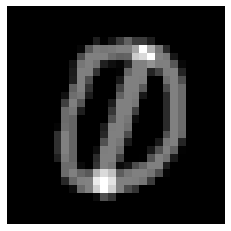

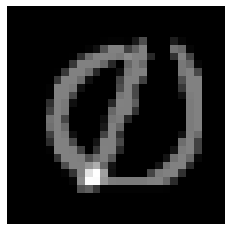

In [23]:
Mixes = np.load('Data/mixed.npy')
print(Mixes.shape) # Should be (784,100)

plt.imshow(Mixes[:,1].reshape((28,28)), cmap = 'gray')
plt.axis('off') # Removes the x and y axis to plot only the image
plt.show()

plt.imshow(Mixes[:,32].reshape((28,28)), cmap = 'gray')
plt.axis('off') # Removes the x and y axis to plot only the image
plt.show()

(784, 16)
(784, 16)


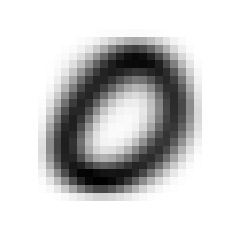

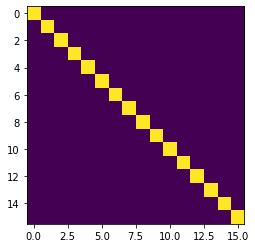

In [24]:
W0 = np.load('Data/W0.npy')
W1 = np.load('Data/W1.npy')
print(W0.shape) # Should be (784,16)
print(W1.shape) # Should be (784,16)

plt.imshow(W0[:,0].reshape((28,28)), cmap = 'gray')
plt.axis('off')
plt.show()

W0TW0 = np.dot(W0.T, W0)
plt.imshow(W0TW0)
plt.show()

3) Thirdly, we want to implement a function that calculates $\mathbf{u}$ and $\mathbf{v}$. This function is implemented below, and makes use of the QR solver that we implemented in Task 1. We know from earlier that the solve_QR() is quite efficient, but it requires that we have already calculated QR. To calculate QR we use np.linalg.qr() insted of our own QR_decomp() because, as discussed earlier, it is much faster. The function calculates the QR of $C$, and then uses these values to find $\mathbf{u}$ with solve_QR(). $\mathbf{v}$ is then trivial to find.  

In [25]:
n = W0.shape[0]

In [26]:
def calc_uv(image_vec, W0, W1): #image_vec er y vec
    '''
    Takes in a solution vector y and basis W0 and W1, and returns u and v. Solves the system Cu = d and v = y - u. The function 
    calculates C and d, and then uses QR decomposition and solve_QR() (similar to what we did in task 1) to find u. 
    Input:
        Image_vec with dimention n
        Vector W0 
        Vector W1
    Output:
        Vector u with dimention n
        Vector v with dimention n
    '''
    n = np.shape(np.dot(W0,W0.T))[0]
    I = np.identity(n)
    W0W0T = np.dot(W0,W0.T)
    W1W1T = np.dot(W1,W1.T) 
    
    C = 2*I - W0W0T - W1W1T
    d = np.dot((I - W1W1T),image_vec)
    
    Q,R = np.linalg.qr(C)
    u = solve_QR(Q, R, d)
    v = image_vec - u
    return u, v 

u, v = calc_uv(Mixes[:,1], W0, W1)


In the code block below we time how long it takes to separate all 100 images:

In [29]:
%%timeit -r 1 -n 1
for i in range(N-1):
    calc_uv(Mixes[:,i], W0, W1)

2.54 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Separating all 100 images takes 2.54 seconds. Below, we test calc_uv() with one of the images from the handed-out code. 

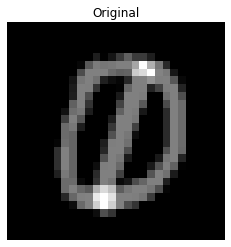

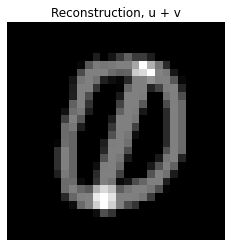

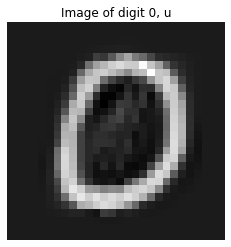

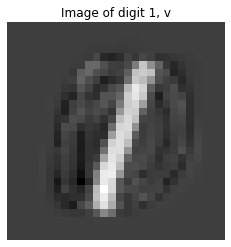

In [28]:
y_vec = u + v #u skal være 0, v skal være 1
plt.imshow(Mixes[:,1].reshape((28,28)), cmap = 'gray')
plt.axis('off')
plt.title('Original')
plt.show()

plt.imshow(y_vec.reshape((28,28)), cmap = 'gray')
plt.axis('off')
plt.title('Reconstruction, u + v')
plt.show()

plt.imshow(u.reshape((28,28)), cmap = 'gray')
plt.axis('off')
plt.title('Image of digit 0, u')
plt.show()

plt.imshow(v.reshape((28,28)), cmap = 'gray')
plt.axis('off')
plt.title('Image of digit 1, v')
plt.show()

Looking at these images, we can see that the reconstruction is equal to the original. In spite of this we can see that the separation was not perfect, because there are noise in both separations $\mathbf{u}$ and $\mathbf{v}$. However, the separated images manage to represent 1 and 0 (but with some noise). As a conclusion, we say that the single channel source separation worked, but with the disadvantage that we get noise in the separations. Additionally, we can say that a disadvantage with the method is that we have to apply machine learing to obtain $W_0$ and $W_1$.  